In [9]:
import sys
sys.path.append('../src')
from get_series import fetch_usd_brl_historical_series

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [11]:
data_dolar= pd.read_csv("../data/usd_brl_historical_series.csv",delimiter=";")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


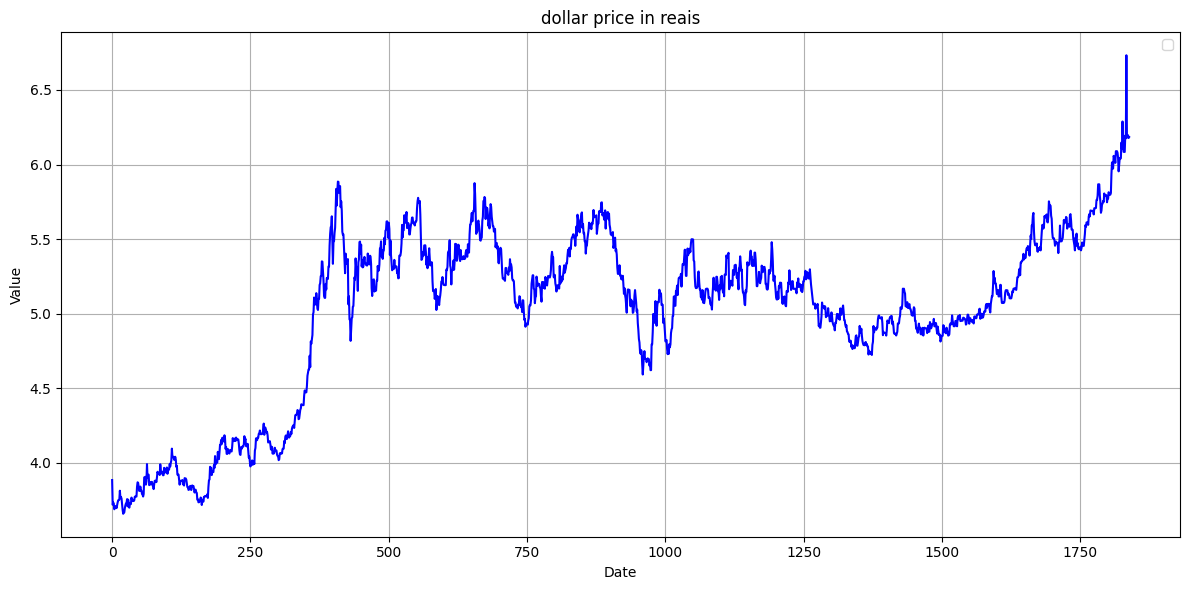

In [12]:
# Plotar valores reais e previstos para a cidade
plt.figure(figsize=(12,6))
plt.plot(data_dolar['Bid (USD-BRL)'],  color='blue')

# Títulos e legendas
plt.title('dollar price in reais')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


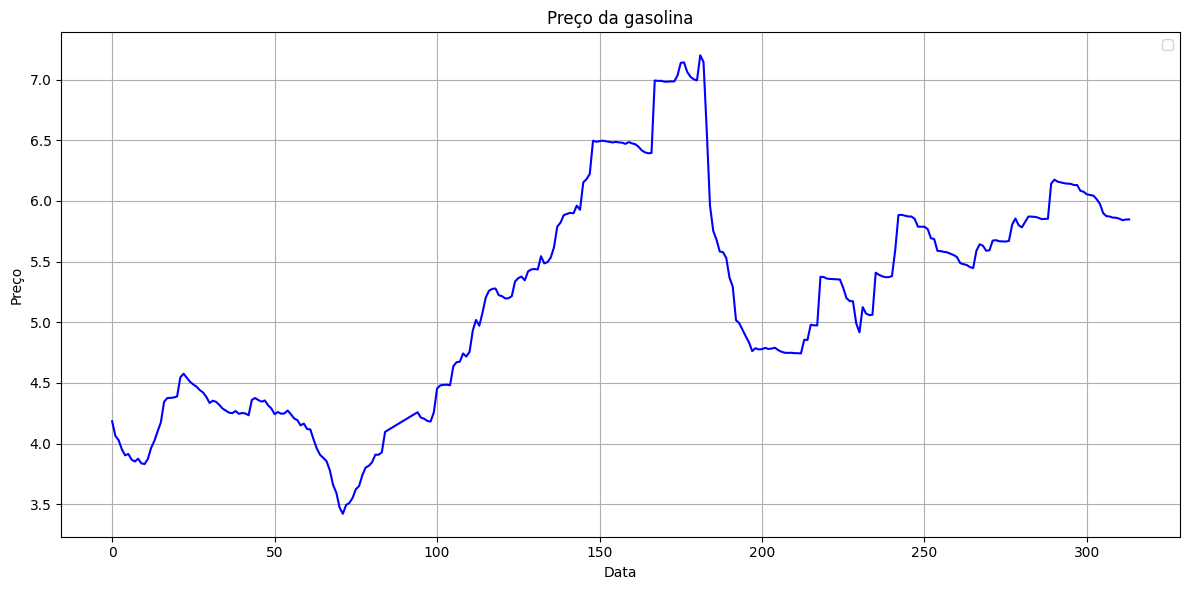

In [13]:

data = pd.read_csv("../data/dados_JOAO PESSOA.week.csv")

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

data['Valor de Venda'].interpolate(method='linear', inplace=True)  # Interpola linearmente


# Plotar valores reais e previstos para a cidade
plt.figure(figsize=(12,6))
plt.plot(data['Valor de Venda'],  color='blue')

# Títulos e legendas
plt.title('Preço da gasolina')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
data_discretizate = (data['Valor de Venda'].diff() > 0).astype(int)

data_discretizate = data_discretizate.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Data da Coleta  314 non-null    object  
 1   Produto         305 non-null    object  
 2   Valor de Venda  314 non-null    float64 
 3   Valor_ql        314 non-null    category
dtypes: category(1), float64(1), object(2)
memory usage: 8.1+ KB
None


,count
Valor_ql,
"[3.421, 4.172)",45
"[4.172, 4.382)",45
"[4.382, 4.972)",45
"[4.972, 5.417)",44
"[5.417, 5.788)",45
"[5.788, 6.141)",45
"[6.141, 7.201)",45


,Data da Coleta,Produto,Valor de Venda,Valor_ql
0,2018-12-30,GASOLINA,4.184500,"[4.172, 4.382)"
1,2019-01-06,GASOLINA,4.063250,"[3.421, 4.172)"
2,2019-01-13,GASOLINA,4.028167,"[3.421, 4.172)"
3,2019-01-20,GASOLINA,3.952458,"[3.421, 4.172)"
4,2019-01-27,GASOLINA,3.903375,"[3.421, 4.172)"
...,...,...,...,...
309,2024-12-01,GASOLINA,5.861579,"[5.788, 6.141)"
310,2024-12-08,GASOLINA,5.853684,"[5.788, 6.141)"
311,2024-12-15,GASOLINA,5.841053,"[5.788, 6.141)"
312,2024-12-22,GASOLINA,5.846842,"[5.788, 6.141)"


In [15]:
data_discretizate

NameError: name 'data_discretizate' is not defined

In [ ]:
import pandas as pd

transicoes = pd.DataFrame({"X": data_discretizate[:-1].values, "Y": data_discretizate[1:].values})

# Suponha que 'transicoes' já esteja definido
tabela_contingencia = pd.crosstab(transicoes['X'], transicoes['Y'])
p_conjunta = tabela_contingencia / tabela_contingencia.values.sum()
p_x = p_conjunta.sum(axis=1)
p_y = p_conjunta.sum(axis=0)

# Criar a tabela final
tabela_final = p_conjunta.copy()
tabela_final["P(X=x)"] = p_x

# Criar uma linha separada para P(Y=y) e concatenar corretamente
linha_py = pd.DataFrame([p_y.tolist() + [1]], columns=tabela_final.columns)
linha_py.index = ["P(Y=y)"]

# Concatenar a linha no final
tabela_final = pd.concat([tabela_final, linha_py])

# Resetar o índice para evitar desalinhamento
tabela_final = tabela_final

# Exibir tabela corrigida
display(tabela_final)


Y,0,1,P(X=x)
0,0.437700,0.150160,0.587859
1,0.146965,0.265176,0.412141
P(Y=y),0.584665,0.415335,1.000000


In [ ]:
# from pgmpy.model2s import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

model = BayesianNetwork([('hasgrowth', 'trend_01')])

# Defining the Conditional Probability Tables (CPDs):
# PRIORS
cpd_hasgrowth = TabularCPD(variable='hasgrowth',
                                 variable_card=2, 
                                 values=[[.5], [.5]], 
                                 state_names={"hasgrowth": ["YES", "NO"]})  # 0- yes, 1-no
print(cpd_hasgrowth)

+----------------+-----+
| hasgrowth(YES) | 0.5 |
+----------------+-----+
| hasgrowth(NO)  | 0.5 |
+----------------+-----+


### Cálculo das Probabilidades Condicionais

A probabilidade condicional é calculada usando a fórmula:

$
P(Y | X) = \frac{P(X, Y)}{P(X)}
$

Os valores calculados são:

$
P(Y=0 | X=0) = \frac{P(X=0, Y=0)}{P(X=0)} = \frac{0.4377}{0.5879} \approx 0.7446
$

$
P(Y=1 | X=0) = \frac{P(X=0, Y=1)}{P(X=0)} = \frac{0.1502}{0.5879} \approx 0.2554
$

$
P(Y=0 | X=1) = \frac{P(X=1, Y=0)}{P(X=1)} = \frac{0.1470}{0.4121} \approx 0.3567
$

$
P(Y=1 | X=1) = \frac{P(X=1, Y=1)}{P(X=1)} = \frac{0.2652}{0.4121} \approx 0.6433
$

### Representação da Tabela `cpd_trend_01`

| `hasgrowth` | `trend_01 = 0` | `trend_01 = 1` |
|-------------|---------------|---------------|
| **0**       | **0.7446**    | **0.2554**    |
| **1**       | **0.3567**    | **0.6433**    |


In [ ]:
# LIKELIHOODS: mede o poder de causa e efeito entre as váriaveis
cpd_trend_01 = TabularCPD(variable='trend_01',
                                   variable_card=2,values=[[0.7446, 0.3567],  # P(trend_01=0 | hasgrowth)
                                                        [0.2554, 0.6433]],  # P(trend_01=1 | hasgrowth),
                                   evidence=['hasgrowth'], evidence_card=[2],
                                   state_names={"hasgrowth": ["YES", "NO"],
                                                "trend_01": ["YES", "NO"]})
print(cpd_trend_01)

+---------------+----------------+---------------+
| hasgrowth     | hasgrowth(YES) | hasgrowth(NO) |
+---------------+----------------+---------------+
| trend_01(YES) | 0.7446         | 0.3567        |
+---------------+----------------+---------------+
| trend_01(NO)  | 0.2554         | 0.6433        |
+---------------+----------------+---------------+


In [ ]:
# Associating the CPDs with the network structure.
model.add_cpds(cpd_hasgrowth, cpd_trend_01)
model.check_model()

True

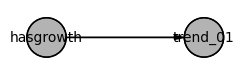

In [ ]:

import matplotlib.pyplot as plt
import daft
# Get a daft object.
model_daft = model.to_daft(node_pos = 'shell', latex=False)
# To open the plot
model_daft.render();


In [ ]:
infer = VariableElimination(model)
posterior_p = infer.query(['hasgrowth'], 
                          evidence={'trend_01': 'YES'})
print(posterior_p)

+----------------+------------------+
| hasgrowth      |   phi(hasgrowth) |
+================+==================+
| hasgrowth(YES) |           0.6761 |
+----------------+------------------+
| hasgrowth(NO)  |           0.3239 |
+----------------+------------------+


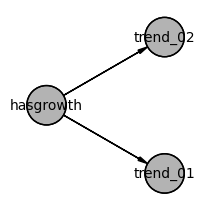

In [ ]:
# INVOLVING A SECOND QUESTION, WITH THE SAME LEVEL OF DIFFICULTY ...
model2 = BayesianNetwork([('hasgrowth', 'trend_01'),
                          ('hasgrowth', 'trend_02')])  # arcs from the cause to the effect

model_daft = model2.to_daft(node_pos = 'shell', latex=False)
# To open the plot
model_daft.render();

In [ ]:
# Defining the CPDs:
# PRIORS

print(cpd_hasgrowth)
# LIKELIHOODS

print(cpd_trend_01)

cpd_trend_02 = TabularCPD(variable='trend_02',
                                   variable_card=2,values=[[0.7446, 0.3567],  # P(trend_01=0 | hasgrowth)
                                                        [0.2554, 0.6433]],  # P(trend_01=1 | hasgrowth),
                                   evidence=['hasgrowth'], evidence_card=[2],
                                   state_names={"hasgrowth": ["YES", "NO"],
                                                "trend_02": ["YES", "NO"]})
print(cpd_trend_02)
# Associating the CPDs with the network structure.
model2.add_cpds(cpd_hasgrowth, cpd_trend_01, cpd_trend_02)
model2.check_model()
# BBN (for qualitative analysis)
# COMPUTING THE POSTERIOR/MARGINAL DISTRIBUTIONS
# from pgmpy.inference import VariableElimination

infer = VariableElimination(model2)
posterior_p2 = infer.query(['hasgrowth'], evidence={
                           'trend_01': 'YES', 
                           'trend_02': 'YES'})
print(posterior_p2)

+----------------+-----+
| hasgrowth(YES) | 0.5 |
+----------------+-----+
| hasgrowth(NO)  | 0.5 |
+----------------+-----+
+---------------+----------------+---------------+
| hasgrowth     | hasgrowth(YES) | hasgrowth(NO) |
+---------------+----------------+---------------+
| trend_01(YES) | 0.7446         | 0.3567        |
+---------------+----------------+---------------+
| trend_01(NO)  | 0.2554         | 0.6433        |
+---------------+----------------+---------------+
+---------------+----------------+---------------+
| hasgrowth     | hasgrowth(YES) | hasgrowth(NO) |
+---------------+----------------+---------------+
| trend_02(YES) | 0.7446         | 0.3567        |
+---------------+----------------+---------------+
| trend_02(NO)  | 0.2554         | 0.6433        |
+---------------+----------------+---------------+
+----------------+------------------+
| hasgrowth      |   phi(hasgrowth) |
+================+==================+
| hasgrowth(YES) |           0.8133 |
+--------